# Modelling an EM wavefunction in time across a varying refactive index

In this notebook I will explore a method of modelling the progation of light as a classical wavefunction in time and in space. The wavefunction equation has a 'hyperbolic' form as shown below:

Equation 1:
$$
\frac{∂^2θ}{∂t^2}=c(x)^2  \frac{∂^2 θ}{∂x^2}
$$

Where θ is the displacement appropriate to the wave in the the electric and/or the magnetic field and c is the wave speed. This model will follow boundary behaviour of a wave by varying the refractive index and modelling the function as it passes through and is reflected by this boundary. This will affect the wave speed, c which may be given as a function of the refractive index:

Equation 2:
$$
c(x)= \frac{c}{n(x)} 
$$

Where n is a function of the refractive index (R.I.) of the substance the light is passing through at position x. As the refractive index increases the wave speed decreases and vica versa.





In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Creating up the wave equation update function

The r parameter in the update function below is required to be an array as r is a function of c(x) which varies with position as shown in Eq. 2 and in the code will be c(x) be stored as an array itself. The r(x) function is given by the equation:

Equation 3:
$$
r(c)=c(x)\frac{Δt}{Δx}
$$

Where Δt is the time step of the update equation below and Δx is the step in coordinates between cells in the array.



In [2]:
def explicit_wave_eq_update(theta_n, theta_nm1,r):
    """Creates an array of the wavefunction values at the next timestep-
    using finite differences of a hyperbolic equation.
    Inputs: 
    theta_n   Wave at time t_n     = n*dt
    theta_nm1 Wave at time t_{n-1} = (n-1)*dt
    r         Array (c(x)*dt/dx)
    Output:
    theta at time t_{n+1} = (n+1)*dt """
    
    #initialising
    len = np.size(theta_n)
    theta_np1 = np.zeros(len)
    
    #updating over all cells
    for i in range(len):
        theta_np1[i] = (2*(1-(r[i]**2)) * theta_n[i] - theta_nm1[i] + (r[i]**2) * 
                                (np.roll(theta_n,-1)[i] + np.roll(theta_n,+1)[i]))
    
    return theta_np1

### Setting up the wave along with initial conditions

In [3]:
frequency = 1    # Hz
wavelength = 1   # m
k = (2*np.pi)/wavelength  # /m
ang_freq = (2*np.pi)*frequency


N = 30     #no. points/wavelength
mult =  5  #no. wavelengths
r = 0.3*np.ones(mult*N)
# Start and end points for change of r
st = N*2+1
en = N*3
r[st:en] = 0.15

# Initialise
dx = wavelength/N
# dt is constant (ratio of r/c is constant)
dt = (r[0]*dx)/(wavelength*frequency)
x = np.arange(0,mult*wavelength,dx)

### Running the solver and storing the results

In [4]:
t = 0
theta_0 = np.sin(k*x - ang_freq*t)
t += dt
theta_1 = np.sin(k*x - ang_freq*t)
# Restrict initial wave to one wavelength
theta_0[0] = 0
theta_1[0] = 0
theta_0[N:] = 0.0
theta_1[N:] = 0.0

# Run for at least 300 steps
iters = 300

#creating arrays
store_theta = np.zeros((iters+2,mult*N))
store_theta[0,:] = theta_0
store_theta[1,:] = theta_1
time = np.linspace(0,(iters+2)*dt,iters+2)
x2d,time2d = np.meshgrid(x,time)


#updating and storing 
for n in range(iters):
    theta_next = explicit_wave_eq_update(theta_1,theta_0,r)
    theta_next[0] = 0
    theta_0 = theta_1
    theta_1 = theta_next
    store_theta[n+2,:] = theta_1

#### Plotting the Results

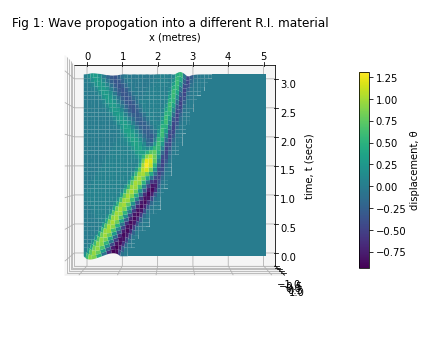

In [5]:
#plotting the wavefunction over time
fig = plt.figure(figsize=(20,6))
ax3d = fig.add_subplot(1,2,1,projection='3d')
surf = ax3d.plot_surface(x2d,time2d,store_theta,cmap='viridis')
ax3d.view_init(90,270) 
ax3d.set_xlabel('x (metres)')
ax3d.set_ylabel('time, t (secs)',labelpad=10)
ax3d.set_title('Fig 1: Wave propogation into a different R.I. material',y=1)
fig.colorbar(surf,shrink=0.6,label='displacement, θ')

In this plot an intial wavefunction starts off between x = 0m and x = 1m and as time goes on the wavefunction moves forwards until it reaches the boundary at x = 2m around 150 seconds. Beyond this boundary is an area of lower refractive index, this area lies between x = 2m and x = 3m. Due to the difference in refrative index some of the wave is transmitted through the boundary and continues in the positive x-direction as time continues. This part of the wavefunction has been refracted, this can be conlcuded as the path of this light is steeper than before passing across the boundary, showing it has decreased in speed. The other part of the intial wavefunction is reflected in the barrier and begins the travel in the negative x-direction. Both parts decrease in amplitude as the energy has been split apart.

#### Plotting Snapshots of the Wave in time

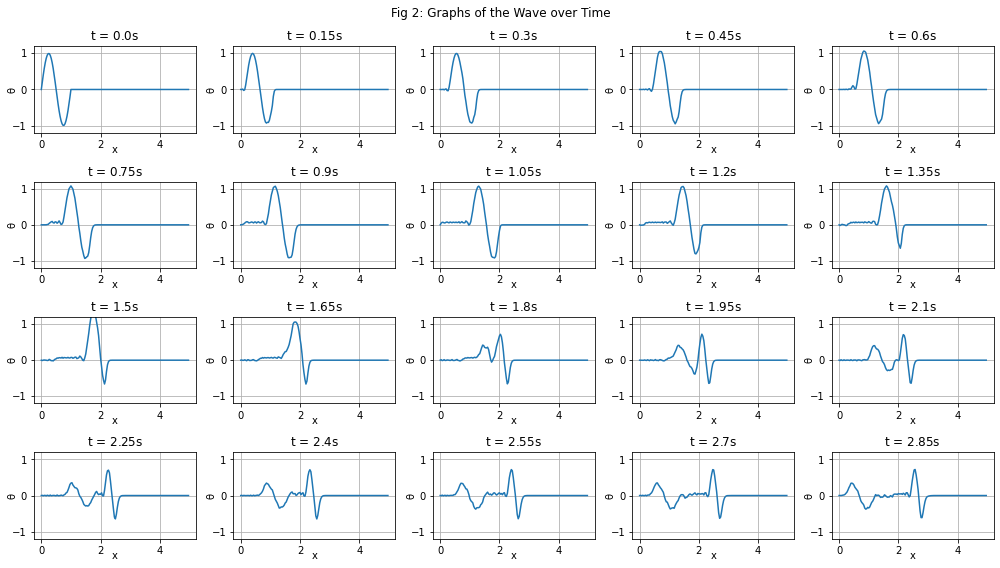

In [6]:
fig_parts = plt.figure(figsize=(14,8))
fig_parts.suptitle('Fig 2: Graphs of the Wave over Time')
rows = 4
cols = 5
num  = rows*cols
step = int(iters/num)
for i in range(num):
    ax = fig_parts.add_subplot(rows,cols,i+1)
    ax.plot(x, store_theta[i*step])
    ax.set_xlabel('x',labelpad=-5)
    ax.set_ylabel('θ',labelpad=-5)
    ax.set_ylim((-1.2,1.2))
    ax.set_title(f't = ${np.round(i*step*dt,2)}$s')
    ax.grid()
fig_parts.tight_layout()

This series of 2d line graphs of the wavefunction's propogation in time is extremely useful, it is possible to see the wavefunction advance towards the boundary at x = 2 and the resulting interaction with the boundary. The wavefunction partially reflects and the other refracts across the boundary. In the final few frames it is possible to see two peaks travelling in opposite directions.

At the graph at t = 1.5s it is possible to see constructive interference as the first part of the wave is partially reflected in the boundary and is inverted and as it begins to travel in the negative x-direction it interferes with the second half of the wave still travelling in the positive x-direction and a super-position occurs.

### Varying refractive index

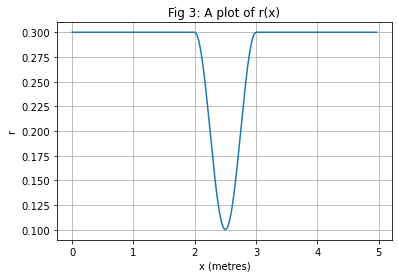

In [7]:
#creating intial wave
t = 0
theta_0v = np.sin(k*x - ang_freq*t)
t += dt
theta_1v = np.sin(k*x - ang_freq*t)
theta_0v[0] = 0
theta_1v[0] = 0
theta_0v[N:] = 0.0
theta_1v[N:] = 0.0
# setting new r array and plotting
rv = 0.3*np.ones(mult*N)
rv[N*2+1:N*3] = (0.1 * (np.cos(2 * np.pi * (x - 2*wavelength)/wavelength) + 2))[N*2+1:N*3]
plt.plot(x,rv)
plt.xlabel('x (metres)')
plt.ylabel('r')
plt.title('Fig 3: A plot of r(x)')
plt.grid()

# Run for 600 steps
iters = 600

#creating meshgrid
time = np.linspace(0,(iters+2)*dt,iters+2)
x2d,time2d = np.meshgrid(x,time)

#results store
store_thetav = np.zeros((iters+2,mult*N))
store_thetav[0,:] = theta_0v
store_thetav[1,:] = theta_1v

for n in range(iters):
    theta_nextv = explicit_wave_eq_update(theta_1v,theta_0v,rv)
    theta_nextv[0] = 0
    theta_nextv[mult*N-1] = 0
    theta_0v = theta_1v
    theta_1v = theta_nextv
    store_thetav[n+2,:] = theta_nextv

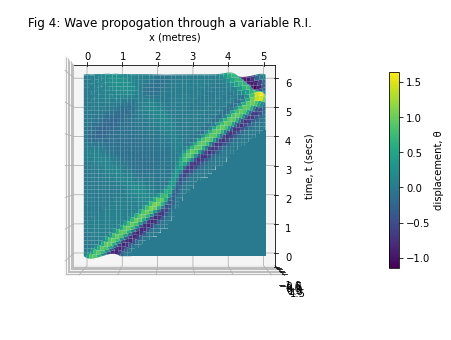

In [8]:
#plotting the wavefunction over time
fig3d3 = plt.figure(figsize=(20,6))
ax3d2 = fig3d3.add_subplot(1,1,1,projection='3d')
surf2 = ax3d2.plot_surface(x2d,time2d,store_thetav,cmap='viridis')
ax3d2.view_init(90,270) 
ax3d2.set_xlabel('x (metres)')
ax3d2.set_ylabel('time, t (secs)',labelpad=10)
ax3d2.set_title('Fig 4: Wave propogation through a variable R.I.',y=1)
fig3d3.colorbar(surf2,shrink=0.6,label='displacement, θ')

In Fig 4. it is possible to see the wave propogate towards x = 2 where the R.I. of the material begins to increase, however in comparison to  Fig 1. the r(x) is continuous and as the wave reaches the changing R.I. the wave is is nearly entirely transmitted and there is very little reflection at any point where the R.I. changes. This is due to the change in R.I. being incremental at each dx preventing significant reflective boundary behaviour to occur. The wave slows down and is refracted between x = 2 and x = 3 as can be seen in the steeper path taken between these points.

In the top right of Fig 4. the wave reflects in the solid boundary that has been set at x = 5m.